<a href="https://colab.research.google.com/github/twelvesense/first-repository/blob/master/ExplNode10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 프로젝트: 인물 모드 문제점 찾기

# 1 기본 준비

In [ ]:
# 모듈 준비
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation       # tensorflow 2.5.0 이하 호환
from matplotlib import pyplot as plt

In [ ]:
# PixelLib 적용
model_dir = './data/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]

# 2 인물모드 직접 해 보기

# 2.1 본인 인물모드

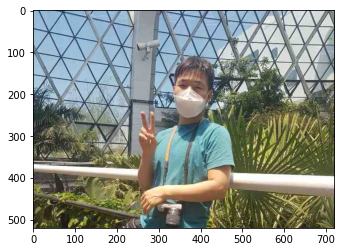

In [ ]:
# 원본 사진
img_path = './data/images/me.png'  
img_orig = cv2.imread(img_path) 

plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

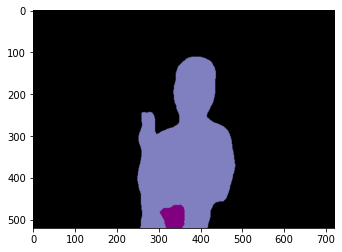

In [ ]:
# segmentAsPascalvoc 세그멘테이션 모델의 결과 (BGR)
segvalues, output = model.segmentAsPascalvoc(img_path)
plt.imshow(output)
plt.show()

In [ ]:
# segvalues의 class_ids와 masks
segvalues

{'class_ids': array([ 0,  5, 15], dtype=int64),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [ ]:
# segvalues의 class_ids
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
bottle
person


In [ ]:
# output의 색상
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:16]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128]])

In [ ]:
# PixelLib 15번째 사람 색상 (RGB)
colormap[15]

array([192, 128, 128])

(520, 720)


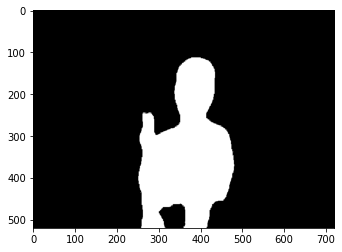

In [ ]:
# seg_color 마스크
seg_color = (128,128,192)           # output에서 추출할 색상 값 (BGR)
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

In [ ]:
# 이미지 mask

# img_show = img_orig.copy()
img_mask = seg_map.astype(np.uint8) * 255
# color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)   # 255와 0의 적당한 색상 적용
# img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)
# plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
# plt.show()

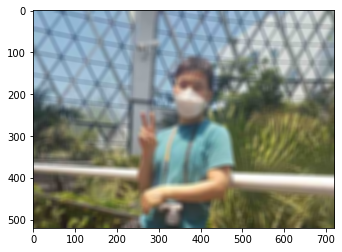

In [ ]:
# (13,13) blurring kernel이용한 흐려진 이미지
img_orig_blur = cv2.blur(img_orig, (13,13))  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

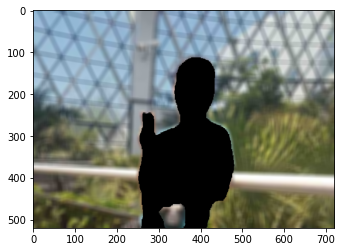

In [ ]:
# 흐려진 이미지에서 세그멘테이션 마스크를 이용해서 배경만 추출
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

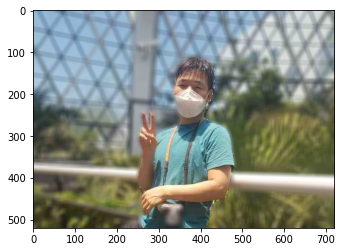

In [ ]:
# 이미지 합성
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

# 2.2 고양이 인물모드

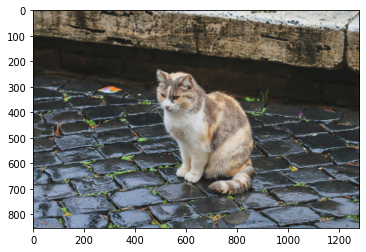

In [ ]:
# 원본 사진
img_path = './data/images/cat.png'  
img_orig = cv2.imread(img_path) 

plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

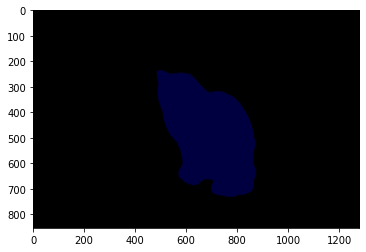

In [ ]:
# segmentAsPascalvoc 세그멘테이션 모델의 결과 (BGR)
segvalues, output = model.segmentAsPascalvoc(img_path)
plt.imshow(output)
plt.show()

In [ ]:
# segvalues의 class_ids와 masks
segvalues

{'class_ids': array([0, 8], dtype=int64),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [ ]:
# segvalues의 class_ids
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
cat


In [ ]:
# output의 색상
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:9]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0]])

In [ ]:
# PixelLib 8번째 고양이 색상 (RGB)
colormap[8]

array([64,  0,  0])

(853, 1280)


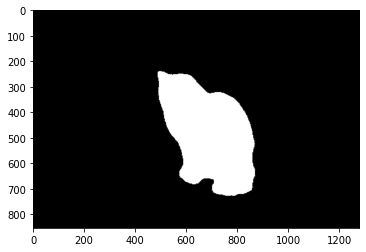

In [ ]:
# seg_color 마스크
seg_color = (0,0,64)           # output에서 추출할 색상 값 (BGR)
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

In [ ]:
# 이미지 mask
img_mask = seg_map.astype(np.uint8) * 255

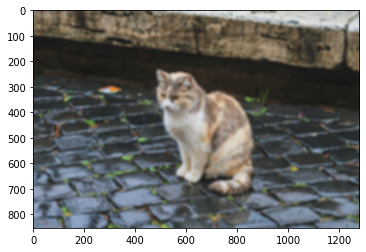

In [ ]:
# (13,13) blurring kernel이용한 흐려진 이미지
img_orig_blur = cv2.blur(img_orig, (13,13))  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

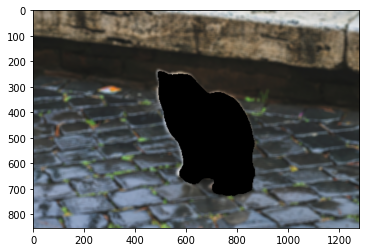

In [ ]:
# 흐려진 이미지에서 세그멘테이션 마스크를 이용해서 배경만 추출
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

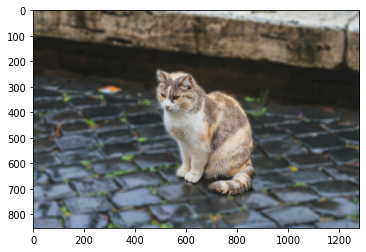

In [ ]:
# 이미지 합성
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

# 2.3 배경전환

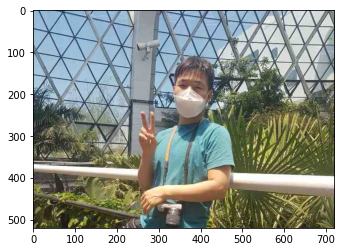

In [ ]:
# 원본 사진
img_path = './data/images/me.png'  
img_me = cv2.imread(img_path) 

plt.imshow(cv2.cvtColor(img_me, cv2.COLOR_BGR2RGB))
plt.show()

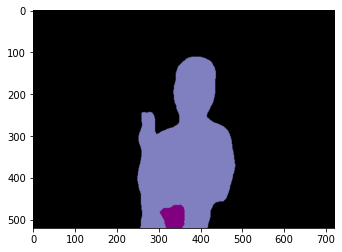

In [ ]:
# segmentAsPascalvoc 세그멘테이션 모델의 결과 (BGR)
segvalues, output = model.segmentAsPascalvoc(img_path)
plt.imshow(output)
plt.show()

In [ ]:
# segvalues의 class_ids와 masks
segvalues

{'class_ids': array([ 0,  5, 15], dtype=int64),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [ ]:
# segvalues의 class_ids
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
bottle
person


In [ ]:
# output의 색상
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:16]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128]])

In [ ]:
# PixelLib 15번째 사람 색상 (RGB)
colormap[15]

array([192, 128, 128])

(520, 720)


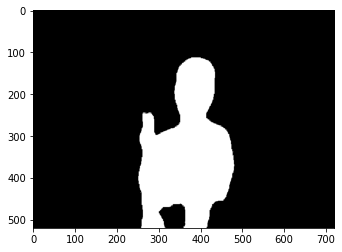

In [ ]:
# seg_color 마스크
seg_color = (128,128,192)           # output에서 추출할 색상 값 (BGR)
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

In [ ]:
# 이미지 mask
img_mask = seg_map.astype(np.uint8) * 255

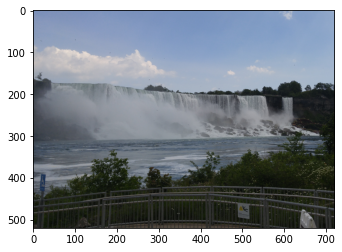

In [ ]:
# 배경 사진
img_path = './data/images/bg.png'  
img_bg = cv2.imread(img_path) 

plt.imshow(cv2.cvtColor(img_bg, cv2.COLOR_BGR2RGB))
plt.show()

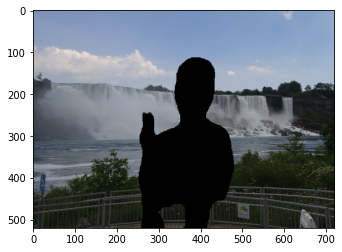

In [ ]:
# 배경 이미지에서 세그멘테이션 마스크를 이용해서 배경만 추출
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_masked = cv2.bitwise_and(img_bg, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_masked, cv2.COLOR_BGR2RGB))
plt.show()

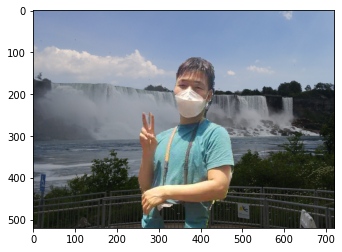

In [ ]:
# 이미지 합성
img_concat = np.where(img_mask_color==255, img_me, img_bg_masked)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

# 3 사진에서 문제점 찾기

# 3.1 본인 인물모드

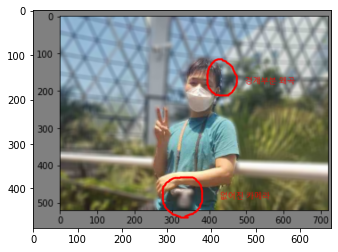

In [ ]:
img_path = './data/images/output1_memo.png'  
img_output1 = cv2.imread(img_path) 

plt.imshow(cv2.cvtColor(img_output1, cv2.COLOR_BGR2RGB))
plt.show()

# 3.2 고양이 인물모드

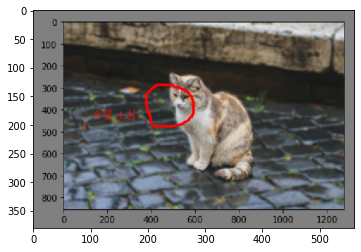

In [ ]:
img_path = './data/images/output2_memo.png'  
img_output2 = cv2.imread(img_path) 

plt.imshow(cv2.cvtColor(img_output2, cv2.COLOR_BGR2RGB))
plt.show()

# 3.3 배경 전환

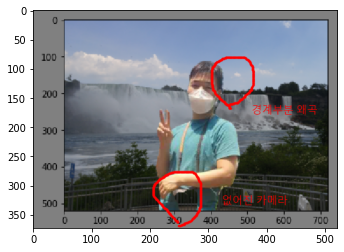

In [ ]:
img_path = './data/images/output3_memo.png'  
img_output3 = cv2.imread(img_path) 

plt.imshow(cv2.cvtColor(img_output3, cv2.COLOR_BGR2RGB))
plt.show()

# 4 해결 방법을 제안해 보기
DeepLab 모델의 Semantic Segmentation 이 만들어 낸 Mask 영역에 어떻게 적용되어 문제점을 보완하게 되는지의 메커니즘이 포함된 솔루션이어야 합니다.
# 세그멘테이션의 한계
Semantic segmentation의 부정확성이 여러 가지 문제를 발생시키는 주요 원인입니다.
엔지니어로서 본인이 선택한 솔루션을 잘 설명해 주세요. 가능하다면 순서도(Flow Chart)를 활용하면 좋습니다. 멋진 아이디어를 기대하겠습니다!!